# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE 
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegressionCV

# Loading dataset

In [4]:
review = pd.read_table('amazon_alexa.tsv',sep='\t')
review.to_csv()

',rating,date,variation,verified_reviews,feedback\r\n0,5,31-Jul-18,Charcoal Fabric ,Love my Echo!,1\r\n1,5,31-Jul-18,Charcoal Fabric ,Loved it!,1\r\n2,4,31-Jul-18,Walnut Finish ,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.",1\r\n3,5,31-Jul-18,Charcoal Fabric ,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1\r\n4,5,31-Jul-18,Charcoal Fabric ,Music,1\r\n5,5,31-Jul-18,Heather Gray Fabric ,"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.",1\r\n6,3,31-Jul-18,Sandstone Fabric ,"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a

In [5]:
review

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


# 3150 rows and 5 columns

In [7]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [8]:
review.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

# Deleting unnecessary columns

In [9]:
review.drop(['rating','date','variation'],axis=1,inplace=True)

In [10]:
review

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


# Different Feedbacks 

In [11]:
review['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

<AxesSubplot:xlabel='feedback', ylabel='count'>

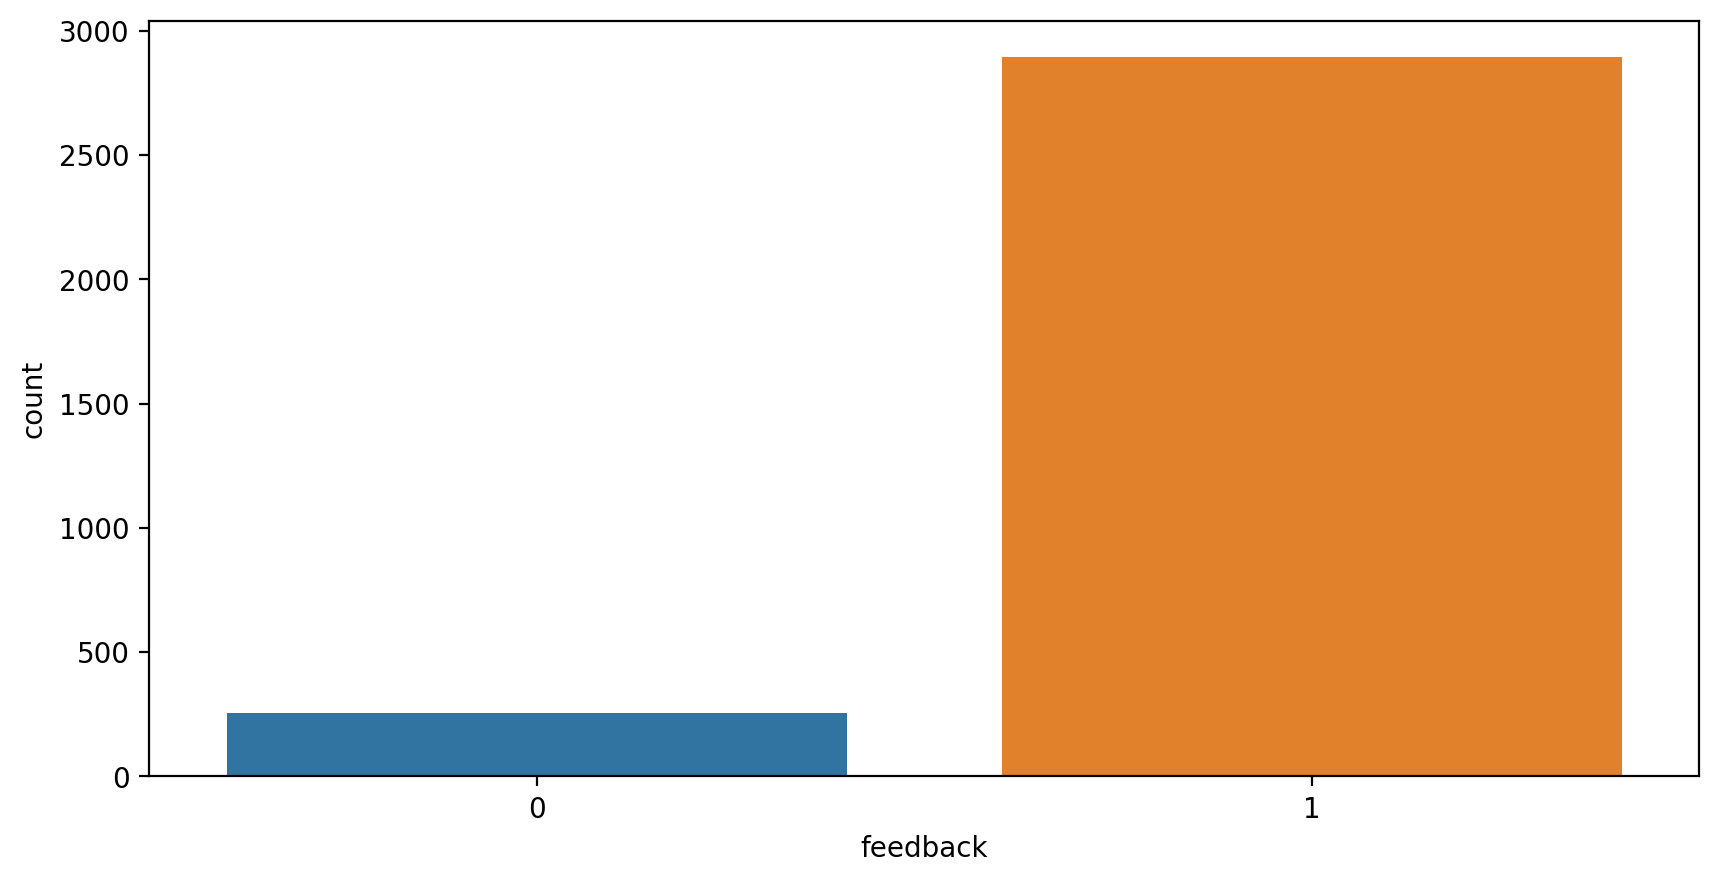

In [12]:
plt.figure(figsize=(10,5),dpi=200)
sns.countplot(x='feedback',data=review)

# Data preprocessing

In [13]:
review

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [14]:
stop = stopwords.words('english')

In [17]:
stop.extend(string.punctuation)

In [18]:
stop.extend(string.digits)

In [19]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
lemmatizer = WordNetLemmatizer()

In [21]:
stemmer = PorterStemmer()

In [22]:
def prep(i):
    i = i.lower()
    words = nltk.word_tokenize(i)
    words=[stemmer.stem(word) for word in words if word not in stop and (len(word)>=3) and (len(word)<=20)]
    return ' '.join(words)

In [24]:
review['verified_reviews'] = review.verified_reviews.apply(prep)

In [26]:
review['verified_reviews'][777]

"great technolog n't believ speaker volum qualiti wonder wish bought anoth one"

# Balancing data

### Tfidf vectorization & splitting into train test

In [27]:
tf=TfidfVectorizer()

In [28]:
xva = review['verified_reviews']

In [29]:
yva = review['feedback']

In [30]:
xva = tf.fit_transform(xva)

In [31]:
smc = SMOTETomek()

In [32]:
xva, yva = smc.fit_sample(xva,yva)

In [33]:
xva

<5786x2877 sparse matrix of type '<class 'numpy.float64'>'
	with 81215 stored elements in Compressed Sparse Row format>

In [34]:
xva_train, xva_test, yva_train, yva_test = train_test_split(xva, yva, test_size=0.34, random_state=101)

In [35]:
xva_train

<3818x2877 sparse matrix of type '<class 'numpy.float64'>'
	with 53284 stored elements in Compressed Sparse Row format>

In [45]:
'''param_grid = { 
    'n_estimators': [200,250,260,270,300,350,100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
'''

"param_grid = { \n    'n_estimators': [200,250,260,270,300,350,100, 500],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth' : [4,5,6,7,8],\n    'criterion' :['gini', 'entropy']\n}\n"

### ID3 

In [36]:
id3 = RandomForestClassifier(n_estimators=255, criterion='entropy')

In [37]:
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(xva_train, yva_train)

In [38]:
id3.fit(xva_train, yva_train)

RandomForestClassifier(criterion='entropy', n_estimators=255)

In [39]:
id3_preds = id3.predict(xva_test)

0.9588414634146342
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       972
           1       1.00      0.92      0.96       996

    accuracy                           0.96      1968
   macro avg       0.96      0.96      0.96      1968
weighted avg       0.96      0.96      0.96      1968



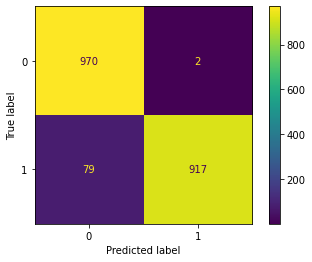

In [40]:
id3_score = accuracy_score(yva_test, id3_preds)
print(id3_score)
id3_matrix = plot_confusion_matrix(id3, xva_test, yva_test)
print(id3_matrix)
id3_report = classification_report(yva_test, id3_preds)
print(id3_report)

### Random Forest Classifier 

In [41]:
rfc = RandomForestClassifier(n_estimators=250, criterion='gini')

In [42]:
rfc.fit(xva_train, yva_train)

RandomForestClassifier(n_estimators=250)

In [43]:
rfc_preds = rfc.predict(xva_test)

0.9603658536585366
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       972
           1       1.00      0.92      0.96       996

    accuracy                           0.96      1968
   macro avg       0.96      0.96      0.96      1968
weighted avg       0.96      0.96      0.96      1968



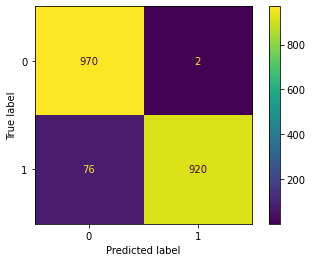

In [44]:
rfc_score = accuracy_score(yva_test, rfc_preds)
print(rfc_score)
rfc_matrix = plot_confusion_matrix(rfc, xva_test, yva_test)
print(rfc_matrix)
rfc_report = classification_report(yva_test, rfc_preds)
print(rfc_report)

### Naive Bayes 

In [45]:
nbva = MultinomialNB()

In [46]:
nbva.fit(xva_train, yva_train)

MultinomialNB()

In [47]:
nbva_preds = nbva.predict(xva_test)

0.9425813008130082
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       972
           1       0.98      0.90      0.94       996

    accuracy                           0.94      1968
   macro avg       0.95      0.94      0.94      1968
weighted avg       0.95      0.94      0.94      1968



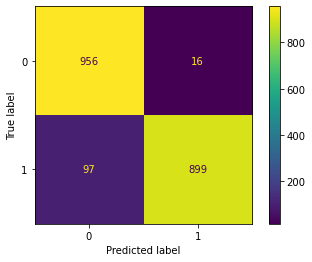

In [48]:
nbva_score = accuracy_score(yva_test, nbva_preds)
print(nbva_score)
nbva_matrix = plot_confusion_matrix(nbva, xva_test, yva_test)
print(nbva_matrix)
nbva_report = classification_report(yva_test, nbva_preds)
print(nbva_report)

### Decision Tree 

In [49]:
dtva = DecisionTreeClassifier()

In [50]:
dtva.fit(xva_train, yva_train)

DecisionTreeClassifier()

In [51]:
dtva_preds = dtva.predict(xva_test)

0.931910569105691
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       972
           1       0.97      0.89      0.93       996

    accuracy                           0.93      1968
   macro avg       0.93      0.93      0.93      1968
weighted avg       0.94      0.93      0.93      1968



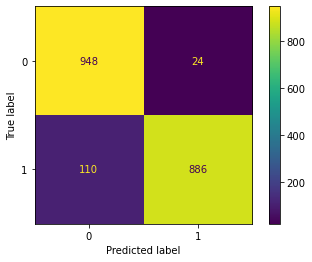

In [52]:
dtva_score = accuracy_score(yva_test, dtva_preds)
print(dtva_score)
dtva_matrix = plot_confusion_matrix(dtva, xva_test, yva_test)
print(dtva_matrix)
dtva_report = classification_report(yva_test, dtva_preds)
print(dtva_report)

### KNN Classifier

In [53]:
knnva = KNeighborsClassifier(n_neighbors=5, leaf_size=5, p=2)

In [54]:
knnva.fit(xva_train, yva_train)

KNeighborsClassifier(leaf_size=5)

In [55]:
knnva_preds = knnva.predict(xva_test)

0.633130081300813
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       972
           1       0.99      0.28      0.43       996

    accuracy                           0.63      1968
   macro avg       0.78      0.64      0.58      1968
weighted avg       0.79      0.63      0.58      1968



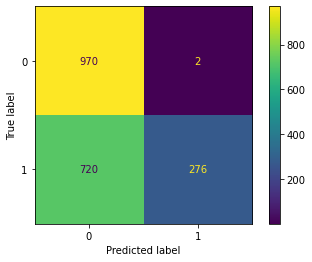

In [56]:
knnva_score = accuracy_score(yva_test, knnva_preds)
print(knnva_score)
knnva_matrix = plot_confusion_matrix(knnva, xva_test, yva_test)
print(knnva_matrix)
knnva_report = classification_report(yva_test, knnva_preds)
print(knnva_report)

### SVC

In [83]:
svcu = SVC(kernel ='linear', gamma = 'scale', shrinking = True)

In [84]:
svcu.fit(xva_train, yva_train)

SVC(kernel='linear')

In [85]:
svcu_preds = svcu.predict(xva_test)

0.9359756097560976
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       972
           1       1.00      0.88      0.93       996

    accuracy                           0.94      1968
   macro avg       0.94      0.94      0.94      1968
weighted avg       0.94      0.94      0.94      1968



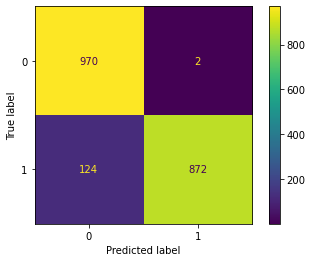

In [86]:
svcu_score = accuracy_score(yva_test, svcu_preds)
print(svcu_score)
svcu_matrix = plot_confusion_matrix(svcu, xva_test, yva_test)
print(svcu_matrix)
svcu_report = classification_report(yva_test, svcu_preds)
print(svcu_report)